In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
im = cv2.imread('a5j8iom9.jpg')

In [5]:
im = np.asarray(im)

In [6]:
print(im.shape)
#image size

(1080, 1920, 3)


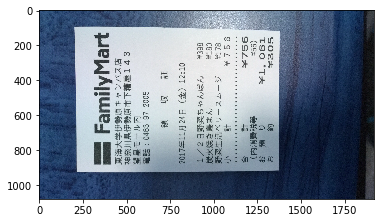

In [34]:
plt.imshow(im)
plt.show()

In [7]:
im2 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

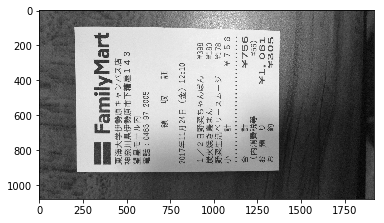

In [10]:
plt.imshow(im2)
plt.gray()
plt.show()

In [39]:
# im3 = cv2.imread("a5j8iom9.jpg", cv2.IMREAD_GRAYSCALE)

In [11]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(im2,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

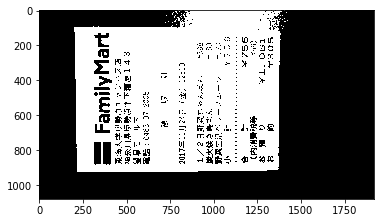

In [13]:
plt.imshow(th3)
plt.gray()
plt.show()

In [14]:
#   import skimage.filters as fil
import skimage.filters as fil

In [64]:
thrOtsu = fil.threshold_otsu(im2)
thrImg = ((thrOtsu > im2) * 255).astype(np.uint8)
nlabel, labelImg, stats, centroids = cv2.connectedComponentsWithStats(thrImg)

In [52]:
thrOtsu

135

In [53]:
nlabel

1022

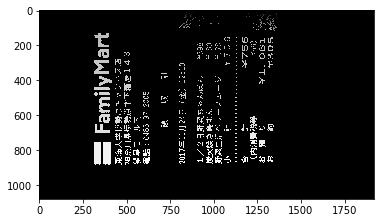

In [65]:
plt.imshow(labelImg)
plt.gray()
plt.show()

In [78]:
# colors = []
# for n in range(1, nlabel):
#    # 各うんこをcrop
#     tmpImg = im[stats[n][1]:stats[n][1]+stats[n][3], stats[n][0]:stats[n][0]+stats[n][2]] #sk.imsave('unko' + str(n) + '.png', tmpImg)
# #     colors.append(np.array([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]))
# leny, lenx = labelImg.shape
# colorImg = np.zeros((leny, lenx, 3)).astype(np.uint8)
# for x in range(lenx):
#     for y in range(leny):
# #         for n in range(1, nlabel):
# #             # 各うんこ領域のラベルに従い色付け
# #             if labelImg[y][x] == n:
# #                 colorImg[y][x] = color[n-1]
# sk.imsave('unko_color.png', colorImg)

NameError: name 'color' is not defined

In [90]:
#copy the stack overflow guy code

In [93]:
import math

In [127]:
im = cv2.imread('a5j8iom9.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.blur(imgray,(15,15))

In [174]:
ret,thresh = cv2.threshold(imgray,math.floor(np.average(imgray)),255,cv2.THRESH_BINARY_INV)
dilated=cv2.morphologyEx(thresh, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10)))
_,contours,_ = cv2.findContours(dilated,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

error: C:\projects\opencv-python\opencv\modules\imgproc\src\morph.cpp:975: error: (-213) Unsupported data type (=4) in function cv::getMorphologyFilter


In [168]:
new_contours=[]
for c in contours:
    if cv2.contourArea(c)<1800:
        new_contours.append(c)

In [169]:
best_box=[-1,-1,-1,-1]
for c in new_contours:
    x,y,w,h = cv2.boundingRect(c)
    if best_box[0] < 0:
        best_box=[x,y,x+w,y+h]
    else:
        if x<best_box[0]:
            best_box[0]=x
        if y<best_box[1]:
            best_box[1]=y
        if x+w>best_box[2]:
            best_box[2]=x+w
        if y+h>best_box[3]:
            best_box[3]=y+h

In [170]:
best_box

[320, 0, 1344, 881]

In [153]:
best_box

[318, 0, 1344, 882]

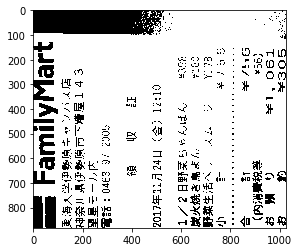

In [171]:
plt.imshow(th3[0:882,318:1344])
plt.gray()
plt.show()

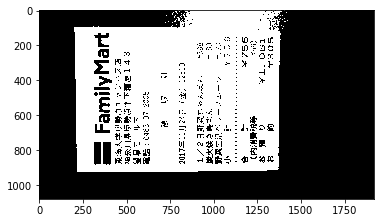

In [147]:
plt.imshow(th3[0:1080,0:1920])
plt.gray()
plt.show()

In [66]:
cv2.imwrite("sample2.png",labelImg)
#save the image

True